In [1]:
##### Importing Relevant Libraries ######
#########################################

import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle ### helps storing data in pickle files

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score ## model evaluation metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler ## (x-mean(variable))/standard_deviation(variable)
from sklearn.model_selection import StratifiedShuffleSplit ### datasplitting
 
from sklearn.model_selection import GridSearchCV          ### hyperparameter finding

from sklearn.tree import DecisionTreeClassifier           ### helps fitting a decision tree
from sklearn.ensemble import RandomForestClassifier       ### models from sklearn

In [2]:
%matplotlib inline

In [3]:
def capping(series,quantile_val):
    cap_value = series.quantile(quantile_val)
    series[series>cap_value] = cap_value
    return(series)

def get_percentages(col_1, col_2, data):
    x = pd.crosstab(data[col_1],data[col_2])
    return(x[1]/(x[1]+x[2]))

In [4]:
####### Loading Data ######
###########################

# cwd = os.getcwd() ##gets current working directory

# data_path = str(cwd) + '/Existing_Base.csv'

data = pd.read_csv(r"C:\Users\91973\OneDrive\Desktop\Stats & ML by Anil\Data\Existing_Base.csv")  ## Loads the data

# Data Exploration

In [12]:
data.shape ## gets the shape of the data

(10155, 32)

In [25]:
data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [33]:
#### Distribution of target class ####

data['Revenue Grid'].value_counts()

#### There is class imbalance in my dataset. We might ask for more observations for class 1.

#### if the distribution is 80%-20% - generally not a major concern.
#### if the distribution is between 80%-20% and 95%-5% -  area of slight concern..
#### if the distribution is less than 95-5% - we should get concerned - expect that your model might be a bad model

Revenue Grid
2    9068
1    1086
Name: count, dtype: int64

In [ ]:
data.info() ### prints out informatio regarding columns in the data

#### Insight #####
####################

# Out of 32 columns, we have around 18 columns of numeric type, 14 columns of string type
# There doesn't seem to have missing values in the columns, however we would investigate this once again

####### Insights ########

# Ref number can be dropped
# Remove the - and convert age_band into numeric... if there are not too many unique age_bands we may even create dummies.
# Remove the >< and convert the family_income into a numeric column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

In [7]:
numeric_cols = data.select_dtypes(include = np.number)
print(numeric_cols)
print()
print(numeric_cols.columns)

       REF_NO  year_last_moved  Average Credit Card Transaction  \
0           1             1972                           148.44   
1           2             1998                             0.00   
2           3             1996                             0.00   
3           5             1997                             0.00   
4           6             1995                            73.45   
...       ...              ...                              ...   
10150   11512             1972                             0.00   
10151   11513             1988                             0.00   
10152   11514             1992                           124.93   
10153   11516             1970                             0.00   
10154   11518             1996                             0.00   

       Balance Transfer  Term Deposit  Life Insurance  Medical Insurance  \
0                142.95          0.00           81.96               0.00   
1                 74.98          0.00      

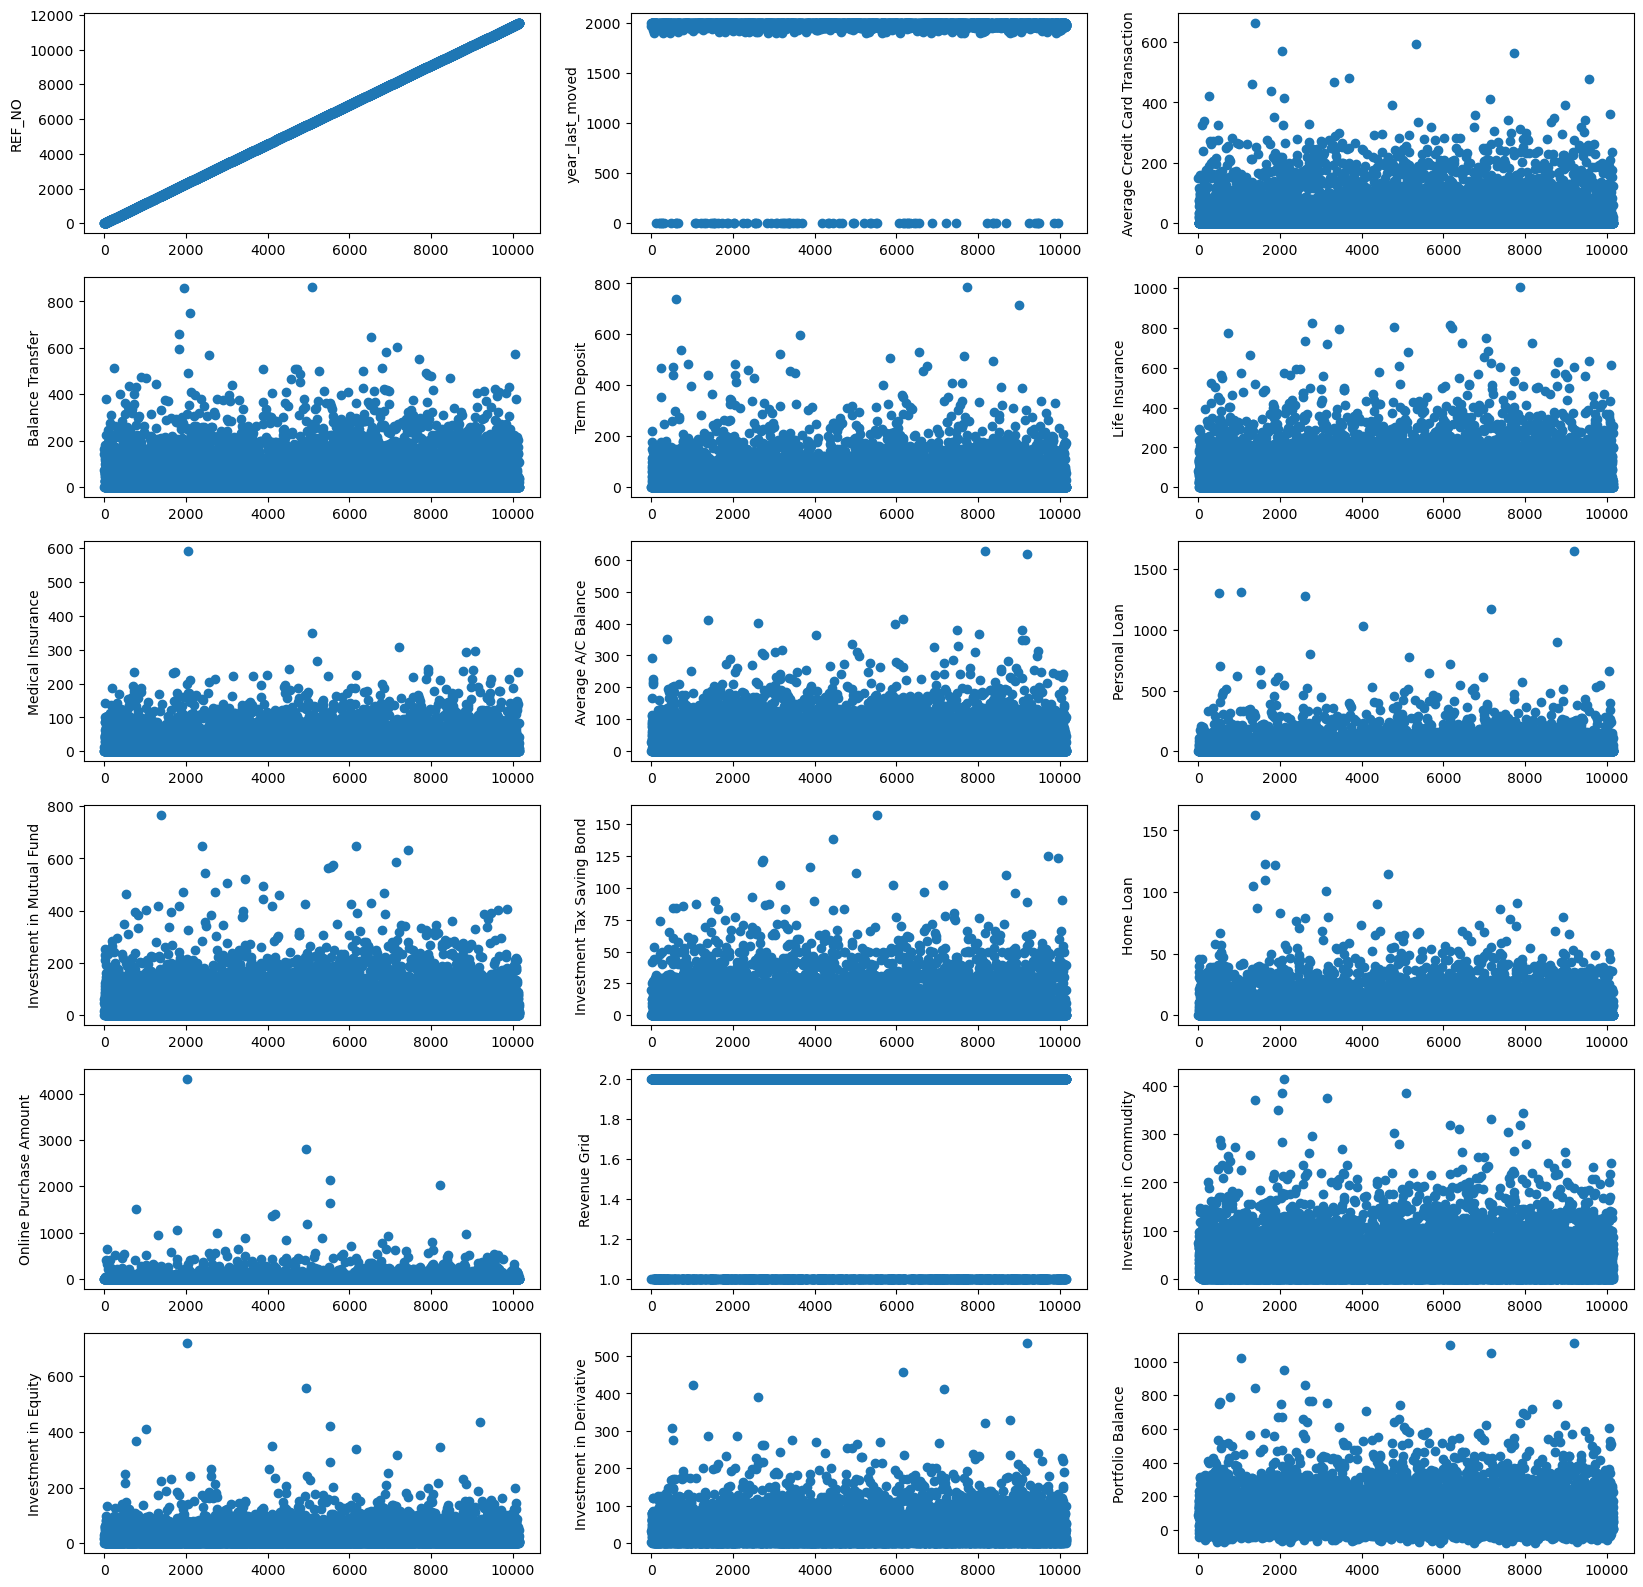

In [31]:
#### Visualizing numeric columns ######

numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 6
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1
        
###### Insights #####
#####################

## Ref Number column just contains the index so can be removed.
## year_last_moved column seem to have many values close to 0 or 0, these seem to be missing values, investigate them.
## Average_credit_card_transaction,Balance Transfer seems to be highly right skewed, check if the skewness could be reduced. ###Later
## A single customer with very high value of balance transfer/life insurance etc stands out, this row could be considered outlier and be removed, #row number 250
## Capping could be done to limit the impact of outliers.
## Scaling could be done since the scale is different for most of the variables.

In [29]:
data.loc[(data['Life Insurance']>2500),:]

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
250,279,1,41-45,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,9.48,0.0,0.0,2,Male,North,1231.09,1279.1,1771.16,4283.56


In [30]:
data = data.loc[(data['Life Insurance']<2500),:]

In [ ]:
####### Blanket capping ######### 

for column in column_names:
    if (column not in ['Revenue Grid', 'REF_NO', 'year_last_moved']):
        data[column] = capping(data[column],0.995)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


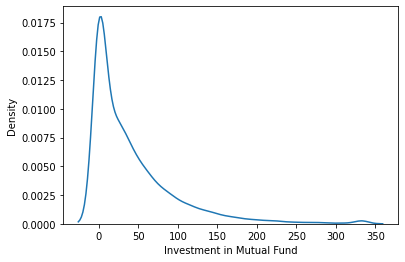

In [ ]:
sns.distplot(data['Investment in Mutual Fund'],hist = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


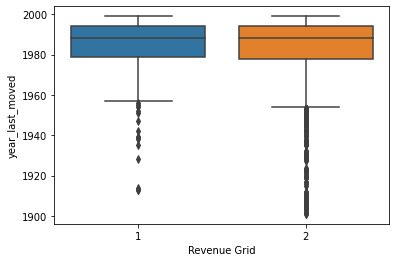

In [ ]:
sns.boxplot(data.loc[data['year_last_moved']>0,'Revenue Grid'], data.loc[data['year_last_moved']>0,'year_last_moved'])

In [ ]:
data[column_names].corr()

,REF_NO,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
REF_NO,1.000000,0.028761,0.000011,-0.004127,0.000615,0.013534,0.020905,-0.007868,0.000631,0.002656,0.000483,-0.010269,0.013725,-0.010524,0.008945,0.002290,0.007874,0.007970
year_last_moved,0.028761,1.000000,0.014358,0.014107,0.003871,0.010838,0.015862,0.002699,0.026256,0.001487,0.012913,0.002971,0.005725,-0.018659,0.017249,0.011644,0.017208,0.018574
Average Credit Card Transaction,0.000011,0.014358,1.000000,0.133388,0.328011,0.151035,0.403543,0.168849,0.113245,0.152820,0.127934,0.074767,0.170826,-0.267974,0.516415,0.232299,0.255322,0.362322
Balance Transfer,-0.004127,0.014107,0.133388,1.000000,0.231827,0.515628,0.169910,0.377324,0.165283,0.364885,0.173876,0.168846,0.167209,-0.084936,0.708201,0.391879,0.501966,0.575718
Term Deposit,0.000615,0.003871,0.328011,0.231827,1.000000,0.288594,0.507283,0.277623,0.159313,0.217648,0.183045,0.170291,0.149483,-0.015281,0.633369,0.304241,0.392197,0.485570
Life Insurance,0.013534,0.010838,0.151035,0.515628,0.288594,1.000000,0.249492,0.526221,0.249827,0.488824,0.277394,0.296593,0.206599,-0.229015,0.787210,0.543036,0.829252,0.761664
Medical Insurance,0.020905,0.015862,0.403543,0.169910,0.507283,0.249492,1.000000,0.266855,0.144416,0.237036,0.207687,0.143855,0.219379,-0.099120,0.567714,0.326574,0.453422,0.487972
Average A/C Balance,-0.007868,0.002699,0.168849,0.377324,0.277623,0.526221,0.266855,1.000000,0.212371,0.472322,0.308162,0.362732,0.238586,-0.116338,0.527257,0.676277,0.711416,0.647402
Personal Loan,0.000631,0.026256,0.113245,0.165283,0.159313,0.249827,0.144416,0.212371,1.000000,0.204402,0.283343,0.172922,0.132403,0.032984,0.265337,0.605287,0.549171,0.466205
Investment in Mutual Fund,0.002656,0.001487,0.152820,0.364885,0.217648,0.488824,0.237036,0.472322,0.204402,1.000000,0.288377,0.272537,0.193740,-0.134439,0.485195,0.693293,0.722203,0.644225


In [ ]:
##### Describing categorical columns #####

cat_data = data.select_dtypes(include = np.object)

column_names = list(cat_data.columns)

for column in column_names:
    print('Column ', column)
    print('Number of unique elements ', cat_data[column].nunique())
    print('***************\n')
    
##### Insights ######
#####################

## post_code has too many unique values, converting them into onehot encoded vectors would blow up the dimensions. Currently we will remove the column and go ahead with the model
## Similarly for post area

Column  children
Number of unique elements  5
***************

Column  age_band
Number of unique elements  13
***************

Column  status
Number of unique elements  5
***************

Column  occupation
Number of unique elements  9
***************

Column  occupation_partner
Number of unique elements  9
***************

Column  home_status
Number of unique elements  5
***************

Column  family_income
Number of unique elements  13
***************

Column  self_employed
Number of unique elements  2
***************

Column  self_employed_partner
Number of unique elements  2
***************

Column  TVarea
Number of unique elements  14
***************

Column  post_code
Number of unique elements  10039
***************

Column  post_area
Number of unique elements  2039
***************

Column  gender
Number of unique elements  3
***************

Column  region
Number of unique elements  13
***************



# Data Preprocessing

In [ ]:
print('The shape of the data before preprocessing ', data.shape)

The shape of the data before preprocessing  (10154, 32)


In [ ]:
remove_cols = []

In [ ]:
#### Preprocess - 1: Remove the post_code, post_area and Ref_no column ####

data.drop(['REF_NO'],axis=1,inplace=True)  ## removes specified columns

### Preprocess -2 :  Identify and remove the outlier row #######

data.loc[data['Life Insurance']>2500,:]

data = data.loc[(data['Life Insurance']<2500),:]

remove_cols.append('REF_NO')

In [ ]:
data.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [ ]:
data.drop(['post_code','post_area'],axis=1,inplace=True)

In [ ]:
print('The shape of the data after first preprocessing block ', data.shape)

data.reset_index(drop=True,inplace=True) ### resetting index

The shape of the data after first preprocessing block  (10154, 29)


In [ ]:
##### Preprocess - 3: Analyze the year_last_moved column ######

print(data['year_last_moved'].describe())

print(np.sum(data['year_last_moved']==0))

##### Insight #####
###################

# Although there aren't many 0's, the column seems to be a bit irrelevant in predicting customers with high transaction potential.
# Hence this coulumn would also be dropped

data.drop(['year_last_moved'],axis=1,inplace=True)

remove_cols.append('year_last_moved')

count    10154.000000
mean      1968.374434
std        180.211011
min          0.000000
25%       1978.000000
50%       1988.000000
75%       1994.000000
max       1999.000000
Name: year_last_moved, dtype: float64
84


In [ ]:
print(data.shape)

(10154, 28)


In [ ]:
###### Preprocess -4 : Capping the numeric columns to 99th percentile #####

numeric_cols = data.select_dtypes(include = np.number) ### find the numeric columns
column_names = list(numeric_cols.columns) ### contains the numeric column names
column_names.remove('Revenue Grid')  ### removing revenue grid
percentile_dict = {}

for column in column_names:  ### iterating over all numeric columns
    percentile_99_val = np.quantile(data[column],0.99)  ### finding the 99th percentile value
    data.loc[data[column]>percentile_99_val,column] = percentile_99_val  ## replace all the values greater than 95th percentile with the 95th percentile value
    percentile_dict.update({column : percentile_99_val})
  

    with open('capping_percentiles.pickle','wb') as f:
        pickle.dump(percentile_dict,f)


In [ ]:
with open('capping_percentiles.pickle','rb') as f:
    a = pickle.load(f)

In [ ]:
data.shape

(10154, 28)

In [ ]:
numeric_cols = data.select_dtypes(include = np.number) ### find the numeric columns
column_names = list(numeric_cols.columns)
data[column_names].describe()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000
mean,22.783652,45.158886,26.498188,64.719952,18.694454,31.349628,23.695686,41.082617,5.928161,4.313837,15.900789,1.893047,35.972247,20.925443,31.292465,88.611054
std,46.792945,67.650321,47.016215,84.651424,29.792376,41.526768,53.187349,52.948857,11.781144,8.897285,45.794930,0.309069,38.108102,24.327893,31.956514,91.307333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-78.430000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.215000,4.670000,8.740000,26.602500
50%,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,2.000000,23.940000,12.980000,21.335000,66.175000
75%,23.980000,65.240000,34.987500,94.380000,27.470000,46.477500,21.480000,59.480000,5.970000,4.490000,7.980000,2.000000,50.787500,28.300000,42.980000,125.917500
max,241.959400,330.846500,248.822400,414.962700,148.659100,195.865300,307.541000,264.973200,57.314000,44.739900,309.257600,2.000000,191.115500,132.717900,167.102700,447.487400


In [ ]:
####### Preprocess-5 : Scaling the columns ######

column_names.remove('Revenue Grid')

scaler = StandardScaler()  ### instance of this object

scaler.fit(data[column_names]) ### it will compute mean and standard deviation of every column

data[column_names] = scaler.transform(data[column_names]) #### apply the formula (x-mean)/s.d

with open('scaler.pickle','wb') as f:
    pickle.dump(scaler,f)

In [ ]:
data[column_names].describe()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04
mean,1.992366e-16,1.780208e-16,-1.520024e-16,2.386203e-16,-1.126662e-15,1.743949e-16,2.815903e-16,3.537613e-16,1.534019e-16,6.735032e-16,8.006748e-16,-8.705531e-17,2.869042e-17,1.012037e-16,1.035873e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-4.869275e-01,-6.675668e-01,-5.636246e-01,-7.645842e-01,-6.275221e-01,-7.549630e-01,-4.455355e-01,-7.759306e-01,-5.032154e-01,-4.848726e-01,-3.472343e-01,-9.439992e-01,-8.601844e-01,-9.792685e-01,-1.829528e+00
25%,-4.869275e-01,-6.675668e-01,-5.636246e-01,-7.645842e-01,-6.275221e-01,-7.549630e-01,-4.455355e-01,-7.759306e-01,-5.032154e-01,-4.848726e-01,-3.472343e-01,-7.284177e-01,-6.682142e-01,-7.057583e-01,-6.791525e-01
50%,-4.869275e-01,-4.020709e-01,-5.636246e-01,-3.867810e-01,-6.104028e-01,-3.939732e-01,-4.455355e-01,-3.324620e-01,-5.032154e-01,-4.848726e-01,-3.472343e-01,-3.157554e-01,-3.266142e-01,-3.116096e-01,-2.457323e-01
75%,2.556811e-02,2.968515e-01,1.805703e-01,3.503959e-01,2.945713e-01,3.643100e-01,-4.166018e-02,3.474728e-01,3.551518e-03,1.980062e-02,-1.729707e-01,3.887882e-01,3.031467e-01,3.657505e-01,4.086012e-01
max,4.684179e+00,4.223213e+00,4.728904e+00,4.137674e+00,4.362561e+00,3.961873e+00,5.336970e+00,4.228639e+00,4.361917e+00,4.543864e+00,6.406195e+00,4.071336e+00,4.595464e+00,4.250054e+00,3.930616e+00


In [ ]:
data.dtypes

children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
TVarea                              object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Revenue Grid                         int64
gender                              object
region     

In [ ]:
##### Preprocessing categorical columns ######

### Analzing the children column ####

print(data['children'].value_counts())

children_pickle = {}

#### Insight ###
################

#Since the occurances of 4+ children is quite low when compared to rest, we can replace them with 3
#Create one hot encoded vectors for the same

data.loc[data['children']== '4+','children'] = '3'

children_data = pd.get_dummies(data['children'],prefix ='chidren')

data.drop(['children'],axis=1,inplace=True)

data = pd.concat([data,children_data],axis=1)

children_pickle.update({'merge_values':{'4+': '3'},
                        'encoder':childer_onehotencoder})

SyntaxError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder

age_band_encoder = OneHotEncoder()

age_band_encoder.fit(data[['age_band']])

dummy_cols = age_band_encoder.transform(data[['age_band']])

with open('age_band_encoder.pickle','wb') as f:
    pickle.dump(age_band_encoder,f)

In [ ]:
with open('age_band_encoder.pickle','rb') as f:
    enocoder = pickle.load(f)

In [ ]:
data.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,HTV,2.685502,1.445609,-0.563625,0.203669,-0.627522,-0.032743,-0.445536,0.394124,1.193647,-0.484873,-0.347234,1,Female,Wales,1.015523,-0.093126,0.032156,0.008970
1,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,Granada,-0.486928,0.440834,-0.563625,-0.457545,-0.627522,-0.754963,-0.445536,-0.775931,-0.503215,-0.484873,-0.347234,2,Female,North West,-0.414165,-0.860184,-0.843765,-0.721019
2,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,Tyne Tees,-0.486928,1.792853,-0.117161,2.677583,-0.242170,3.265293,-0.445536,-0.473926,-0.503215,-0.092599,-0.347234,2,Male,North,1.629334,0.417013,1.554299,0.910913
3,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,Central,-0.486928,-0.667567,-0.563625,-0.522521,-0.627522,0.195314,-0.445536,0.082298,-0.503215,-0.484873,-0.347234,2,Female,West Midlands,-0.836405,-0.278519,-0.429432,-1.427240
4,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,Scottish TV,1.082831,0.189234,-0.563625,1.331408,0.780626,0.195555,-0.239273,3.243995,-0.503215,4.543864,0.220105,2,Female,Scotland,0.897170,1.436059,1.538026,1.603553


In [ ]:
#### Analyzing age_band column ###

print(data['age_band'].value_counts())

#### Insight ####
#################

#Lets add unknown to the most prominant class of 45-50
#The mean age of the band could be taken and this column could be converted into a numeric column, however it so can
#happen that the band actually matters rather than the actual age, hence we create dummies 

data.loc[data['age_band']=='Unknown','age_band'] ='45-50'

age_band_dummies = pd.get_dummies(data['age_band'],prefix = 'age_band')

data.drop(['age_band'],axis=1,inplace=True)

data = pd.concat([data,age_band_dummies],axis=1)

45-50      1359
36-40      1134
41-45      1111
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64


In [ ]:
#### Analyzing status column ###

print(data['status'].value_counts())

#### Insight ####
#################

#Lets add unknown to the most prominant class of Partner
#Create dummeis for the rest 

data.loc[data['status']=='Unknown','status'] ='Partner'

status_dummies = pd.get_dummies(data['status'],drop_first=True,prefix = 'status')

data.drop(['status'],axis=1,inplace=True)

data = pd.concat([data,status_dummies],axis=1)

Partner                 7708
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64


In [ ]:
pd.crosstab(data['status'],data['Revenue Grid'])

KeyError: ignored

In [ ]:
73/(73+606), 838/(838+6871), 117/(117+984), 3/(3+45), 55/(55+563)

(0.10751104565537556,
 0.10870411207679335,
 0.10626702997275204,
 0.0625,
 0.0889967637540453)

In [ ]:
#### Analyzing occupation column ###

print(data['occupation'].value_counts())

occupation_dummies = pd.get_dummies(data['occupation'], drop_first=True, prefix = 'occupation')

data.drop(['occupation'],axis=1,inplace=True)

data = pd.concat([data,occupation_dummies],axis=1)

Professional         2448
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: occupation, dtype: int64


In [ ]:
#### Analyzing occupation_partner column ###

print(data['occupation_partner'].value_counts())

occupation_partner_dummies = pd.get_dummies(data['occupation_partner'],drop_first=True,prefix = 'occupation_partner')

data.drop(['occupation_partner'],axis=1,inplace=True)

data = pd.concat([data,occupation_partner_dummies],axis=1)

Unknown              2394
Professional         2050
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: occupation_partner, dtype: int64


In [ ]:
data.dtypes

children                                 object
home_status                              object
family_income                            object
self_employed                            object
self_employed_partner                    object
TVarea                                   object
Average Credit Card Transaction         float64
Balance Transfer                        float64
Term Deposit                            float64
Life Insurance                          float64
Medical Insurance                       float64
Average A/C Balance                     float64
Personal Loan                           float64
Investment in Mutual Fund               float64
Investment Tax Saving Bond              float64
Home Loan                               float64
Online Purchase Amount                  float64
Revenue Grid                              int64
gender                                   object
region                                   object
Investment in Commudity                 

In [ ]:
#### Analyzing home_status column ###

print(data['home_status'].value_counts())

#### Insight ####
#################

#Apart form own home the other types seem to be some/kind of rented property and the occurances of those are quite few compared to own house
#combine all others into a category called rent
#Create dummies for rest

data.loc[~(data['home_status'] == 'Own Home'),'home_status'] ='Rented Home'

home_status_dummies = pd.get_dummies(data['home_status'],prefix = 'home_status')

data.drop(['home_status'],axis=1,inplace=True)

data = pd.concat([data,home_status_dummies],axis=1)

Own Home                9412
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: home_status, dtype: int64


In [ ]:
#### Analyzing family_income column ###

print(data['family_income'].value_counts())

#### Insight ####
#################

#The family income could be converted into numeric field by taking the mean of the range. We will explore it in the next set of experiments
#In the current experiment, we create dummies

income_dummies = pd.get_dummies(data['family_income'],drop_first=True,prefix = 'income')

data.drop(['family_income'],axis=1,inplace=True)

data = pd.concat([data,income_dummies],axis=1)

>=35,000             2516
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64


In [ ]:
#### Analyzing the self employed, self employed partner and gender column ####

cols = ['self_employed','self_employed_partner','gender']

for column in cols:
    dummies = pd.get_dummies(data[column],drop_first=True,prefix = column)
    data.drop(column,axis=1,inplace=True)
    data = pd.concat([data,dummies],axis=1)

In [ ]:
data.select_dtypes(np.object)

,children,TVarea,region
0,Zero,HTV,Wales
1,Zero,Granada,North West
2,Zero,Tyne Tees,North
3,Zero,Central,West Midlands
4,Zero,Scottish TV,Scotland
...,...,...,...
10149,1,Carlton,South East
10150,Zero,Meridian,South East
10151,2,Central,South East
10152,Zero,Carlton,South East


In [ ]:
data.columns

Index(['children', 'TVarea', 'Average Credit Card Transaction',
       'Balance Transfer', 'Term Deposit', 'Life Insurance',
       'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
       'Investment in Mutual Fund', 'Investment Tax Saving Bond', 'Home Loan',
       'Online Purchase Amount', 'Revenue Grid', 'region',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance', 'age_band_18-21',
       'age_band_22-25', 'age_band_26-30', 'age_band_31-35', 'age_band_36-40',
       'age_band_41-45', 'age_band_45-50', 'age_band_51-55', 'age_band_55-60',
       'age_band_61-65', 'age_band_65-70', 'age_band_71+', 'status_Partner',
       'status_Single/Never Married', 'status_Widowed', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'occupation_Unknown', 'occupation_partner_H

In [ ]:
#### Analyzing the TVarea column #####

print(data['TVarea'].value_counts())

### Insight ####
################

#Intuitively, TVArea doesn't make sense in predicting if the user is a high transaction user or not.
#In the current set we would be removing this column, however doing this might lead to loss of information if it is relevant in anyway. This is a judgemental call

data.drop(['TVarea'],axis=1,inplace=True)

Central          1618
Carlton          1541
Meridian         1226
Yorkshire        1042
Granada          1039
HTV               845
Anglia            751
Tyne Tees         535
Scottish TV       520
TV South West     363
Grampian          227
Unknown           189
Ulster            159
Border             99
Name: TVarea, dtype: int64


In [ ]:
### Analyzing the region column ####

print(data['region'].value_counts())

#region_dummies = pd.get_dummies(data['region'],drop_first=True,prefix = 'region')

data.drop(['region'],axis=1,inplace=True)

#data = pd.concat([data,region_dummies],axis=1)

South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                570
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: region, dtype: int64


In [ ]:
print('The shape of data after all preprocessing ',data.shape)

The shape of data after all preprocessing  (10154, 66)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10154 entries, 0 to 10153
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   children                              10154 non-null  object 
 1   Average Credit Card Transaction       10154 non-null  float64
 2   Balance Transfer                      10154 non-null  float64
 3   Term Deposit                          10154 non-null  float64
 4   Life Insurance                        10154 non-null  float64
 5   Medical Insurance                     10154 non-null  float64
 6   Average A/C Balance                   10154 non-null  float64
 7   Personal Loan                         10154 non-null  float64
 8   Investment in Mutual Fund             10154 non-null  float64
 9   Investment Tax Saving Bond            10154 non-null  float64
 10  Home Loan                             10154 non-null  float64
 11  Online Purchase

In [ ]:
childrens_dummy = pd.get_dummies(data['children'], prefix = 'children')

data = pd.concat([data, childrens_dummy], axis=1)

data.drop(['children'],axis=1, inplace=True)

In [ ]:
data.shape

(10154, 70)


# Modelling Data Prep

In [ ]:
#### Since its a classification problem, converting target column into 0/1s #####

data.loc[data['Revenue Grid']==2,'Revenue Grid'] = 0 ## this replaces all the 2's with 0

data.reset_index(drop=True,inplace=True)

features_df = data.drop(['Revenue Grid'],axis=1)

target_df = data['Revenue Grid']

In [ ]:
features_df.shape, target_df.shape

((10154, 69), (10154,))

In [ ]:
###### Ignore this #######
###### Dimensionality Reduction ####
####################################

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca_obj = PCA(n_components = 51)
#tsne_obj = TSNE(n_components=2) ### text

pca_obj.fit(features_df)  ## identify how can it convert these 68 columns into 30
#tsne_obj.fit(features_df)

transormed_features_df_pca = pca_obj.transform(features_df)  ### actually convert the 68 columns to 30
#transformed_features_df_tsne = tsne_obj.transform(features_df)


In [ ]:
pca_obj.components_[1]

array([ 4.86564038e-01,  6.76508051e-02,  4.24829698e-01, -3.47918853e-02,
        4.21128756e-01, -1.53088622e-01, -2.54348317e-01, -1.84590629e-01,
       -1.90598584e-01, -2.10514563e-01, -8.86952423e-02,  3.06957753e-01,
       -2.73082442e-01, -1.17614588e-01,  1.84927397e-02, -3.09273287e-02,
       -1.40341326e-02, -3.62005430e-03,  4.85815156e-02,  1.23931962e-03,
        2.87402779e-03, -5.71656303e-03, -9.03313070e-03, -1.05593383e-02,
       -3.57362367e-03, -7.68168669e-03,  1.68081227e-03,  7.23599428e-03,
        1.32383254e-02,  7.17795340e-03,  3.11790968e-03, -7.60165273e-03,
        4.79520906e-03,  5.19740327e-03, -1.32578644e-03,  2.20479023e-03,
        1.06542161e-03, -1.28301194e-02,  2.12497134e-02, -3.20630793e-03,
       -4.08162590e-04, -2.41067387e-04,  6.55798415e-04, -6.17257499e-03,
       -2.80199695e-03, -1.11417918e-02,  1.97968611e-02, -3.59483573e-03,
       -7.36192778e-05,  5.46569259e-03, -2.24187413e-03,  2.24187413e-03,
        4.06172614e-03,  

In [ ]:
dir(pca_obj)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

In [ ]:
tsne_obj.kl_divergence_

2.636749267578125

In [ ]:
pd.DataFrame(transormed_features_df_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.138309,1.368799,-0.670672,0.109587,0.399976,1.128307,-1.244228,3.104400,-0.230641,0.184974,-0.506790,-0.320360,-0.384614,-0.158898,-0.313668,0.563746,-0.008951,-0.178180,0.219366,0.011049,-0.010705,-0.513596,-0.199567,0.008459,0.182361,0.133509,0.070806,-0.630778,-0.414778,-0.097009,0.014463,0.063607,0.415438,0.630439,0.269104,-0.109688,-0.671909,0.171010,0.781329,0.296453,0.538738,-0.476145,0.089820,0.584918,-0.412931,0.277838,-0.024420,0.003859,-0.002593,0.093528,0.106380
1,-2.238713,0.205670,-0.927604,0.126352,0.351014,0.658322,-0.011631,0.000809,0.132224,0.985481,0.429273,-0.392293,0.022859,0.013557,-0.001121,-0.147744,-0.117483,0.133949,-0.845131,-0.163897,0.069918,-0.232239,-0.088525,-0.198407,-0.422623,0.485208,-0.063780,0.947533,-0.134046,0.066391,-0.325451,-0.275824,0.597944,-0.060162,0.120600,-0.442707,-0.011018,0.028244,0.024705,-0.079610,-0.292384,0.137951,0.198322,-0.234789,-0.367016,-0.003333,-0.084032,-0.187351,-0.162746,0.013508,-0.047186
2,3.373753,-0.201453,-3.474068,0.019875,0.029384,0.418633,0.286039,-0.242886,2.349608,-0.841436,0.276216,0.202824,0.937250,0.888269,0.215665,0.751837,-0.220913,-0.076804,-0.582325,-0.021908,0.211681,-0.515786,-0.207711,-0.218671,0.643215,-0.403001,-0.182257,0.290638,0.171706,0.886817,0.299989,-0.416989,0.143587,0.176025,-0.057037,-0.279141,0.127971,0.057547,-0.130944,0.176915,-0.009188,0.074168,0.564482,-0.175331,0.406873,-0.045274,0.319195,-0.028117,-0.192836,-0.606326,0.117133
3,-2.013735,-0.659124,-0.261463,0.285623,0.227755,-0.865222,-0.219283,0.067695,0.283481,-0.023130,-0.348007,-0.140100,0.768045,0.123283,-0.386931,0.411876,-0.184638,-0.576865,-0.980642,0.583940,-0.338931,-0.285089,-0.731311,-0.341222,0.185120,-0.182970,-0.211118,0.089099,0.205823,0.027798,-0.230275,-0.079261,0.289181,-0.167916,0.218313,-0.119155,0.004290,-0.442034,-0.551645,-0.059180,0.358835,-0.372900,0.117982,-0.079171,0.143158,0.033275,-0.192094,0.102303,-0.183087,0.245898,0.106013
4,4.247013,-0.787156,-0.527021,1.716658,-1.240391,-1.819990,1.273716,1.511685,-1.856406,0.654045,1.001734,0.893192,0.205903,-0.130529,-0.343567,0.310223,0.235000,-0.231997,0.475926,-0.616997,0.269227,0.728922,0.153861,-0.189287,0.332148,-0.477270,-0.051004,-0.212179,-0.110660,0.056533,0.027785,-0.443407,-0.215811,0.301656,-0.158455,0.017273,0.012827,-0.135921,-0.003080,-0.091244,-0.303164,-0.017926,-0.294403,-0.064988,-0.325216,0.031776,-0.112568,-0.066948,-0.032601,-0.241080,0.094483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,-2.272974,-0.274636,0.197346,-0.417684,-0.073992,0.194519,-0.153560,-0.094868,-0.160937,-0.647703,0.031867,0.398979,-0.174949,-1.108024,-0.025844,0.661670,0.886671,0.281644,-0.269557,0.022461,-0.116406,0.607009,-0.137104,-0.266212,0.448605,-0.490090,-0.081015,-0.154266,0.168128,-0.081915,0.166198,-0.506021,-0.026418,-0.198115,-0.035459,-0.213513,0.121333,-0.027994,-0.136781,0.114305,-0.264615,-0.019654,0.032835,-0.125107,-0.090992,-0.092179,-0.130879,-0.118947,0.041955,-0.062699,0.054933
10150,-0.108433,0.255881,-2.309398,-0.494390,0.369737,1.069768,0.091078,-0.013211,0.024003,0.062616,0.644235,1.128350,0.005219,-0.540901,-0.435432,0.697679,0.204510,-0.547406,0.113869,1.055238,0.834662,0.764376,-0.230839,0.212922,0.056553,-0.158135,-0.132329,-0.098291,0.358910,-0.328455,0.101842,0.820950,0.020921,0.227551,-0.101455,-0.206730,0.003903,0.105793,-0.047349,-0.057095,-0.145464,-0.108333,0.032167,0.470988,-0.595822,0.056234,0.173818,-0.149902,0.088734,-0.232981,-0.007901
10151,-0.519796,3.607810,1.549344,-0.423030,-0.436279,-0.534020,0.168154,0.740047,-0.400064,-1.421850,0.556822,-0.050634,-0.264981,0.021739,-0.151850,-0.987652,-0.402869,0.090480,0.485005,0.057343,0.334008,-0.329692,0.157173,

In [ ]:
pd.DataFrame(transormed_features_df_pca).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.000000e+00,-7.342116e-15,5.444573e-16,8.387941e-16,4.697290e-16,-3.993395e-16,6.593273e-16,5.823382e-16,1.302801e-16,-7.722183e-17,-8.371344e-17,-1.067755e-15,-6.112854e-16,-3.249275e-16,-4.673721e-16,-4.751130e-16,-8.174190e-16,-1.666188e-16,1.170363e-15,3.773048e-16,4.228522e-16,4.464452e-16,2.199931e-15,2.040851e-16,-1.056861e-16,9.411215e-16,9.186594e-16,-1.693057e-16,1.812782e-16,5.618503e-17,3.727078e-16,-2.236354e-16,3.497310e-17,-1.400348e-16,2.085325e-16,-7.346851e-16,2.196778e-17,3.072600e-18,-3.944684e-16,1.129191e-16,-9.508672e-17,-5.875942e-16,3.438283e-16,1.364013e-16,-9.737415e-17,-3.742121e-16,-5.182831e-16,3.909705e-16,7.191560e-16,9.481218e-17,-1.702688e-15
1,-7.342116e-15,1.000000e+00,-7.123557e-16,-2.426870e-16,8.270944e-17,2.143533e-16,-1.538337e-17,-1.536390e-16,-4.741635e-16,2.952939e-17,-4.573393e-16,1.696468e-18,3.459984e-16,-2.040006e-16,2.273711e-17,1.461004e-16,1.382958e-18,-9.073487e-17,2.807476e-16,-2.241958e-16,4.691600e-17,1.737934e-16,-2.798790e-18,1.477029e-16,1.194038e-16,7.164327e-17,-4.248205e-16,-2.072582e-17,8.768140e-17,1.060092e-16,-1.769745e-16,8.814138e-17,-7.002814e-17,7.889145e-17,-2.366469e-16,2.283638e-16,-8.027239e-17,1.037688e-18,-2.289052e-16,-1.469816e-16,5.190609e-18,-2.622446e-16,1.342428e-16,-4.263628e-17,1.883803e-17,7.422145e-17,5.516939e-17,2.801373e-16,4.068636e-17,1.621568e-16,3.483397e-16
2,5.444573e-16,-7.123557e-16,1.000000e+00,-1.314564e-17,1.097888e-16,6.380665e-17,1.037474e-16,2.290924e-16,6.800573e-17,6.792118e-18,8.821998e-17,-1.789760e-16,4.825237e-16,-8.566957e-17,-5.125128e-17,-1.080203e-16,2.939113e-17,4.044578e-16,-1.129005e-16,-3.170167e-16,-3.246814e-16,-1.040545e-16,-7.120653e-17,4.275473e-17,-1.589602e-16,4.186694e-17,2.922169e-16,1.033283e-16,-1.249907e-16,-3.170304e-17,-1.136877e-16,-2.141589e-16,-1.258557e-17,-1.095315e-16,-5.341343e-17,-8.241021e-17,-6.721628e-17,-1.281771e-16,-6.464870e-17,-6.660421e-17,-3.641812e-17,1.591213e-16,2.948503e-16,-5.266201e-17,-1.002945e-16,-9.334127e-17,-4.510591e-16,-1.577888e-16,1.726175e-16,-1.536155e-16,6.918791e-16
3,8.387941e-16,-2.426870e-16,-1.314564e-17,1.000000e+00,-3.010352e-17,2.794226e-16,8.221815e-17,2.737859e-16,-1.266320e-16,1.436151e-16,3.339500e-16,-6.103097e-17,-1.222338e-15,-2.674868e-16,1.675476e-16,2.961562e-16,5.839348e-17,-3.032985e-16,-4.635904e-16,-3.391943e-16,2.699140e-16,3.303962e-16,-2.118348e-16,-1.285279e-16,5.713567e-18,-1.933199e-16,1.959839e-16,5.255238e-17,-1.061947e-16,-1.217267e-16,-2.616843e-16,1.520966e-16,-1.370088e-16,1.818093e-16,-4.156118e-16,1.809662e-16,4.960960e-17,1.819588e-17,-6.427851e-17,-1.112130e-16,-7.533281e-17,-9.985579e-17,-9.316182e-16,3.654466e-16,3.389573e-16,9.242786e-17,-5.703369e-16,2.237399e-16,-5.597754e-16,-1.333167e-15,1.286903e-15
4,4.697290e-16,8.270944e-17,1.097888e-16,-3.010352e-17,1.000000e+00,-4.004767e-16,3.754263e-17,2.562792e-17,-3.091544e-16,-1.107317e-16,2.745474e-17,3.066474e-16,-1.518603e-15,-1.368845e-16,-6.504003e-17,7.858991e-17,-3.908978e-17,1.988913e-16,-2.059904e-16,9.360691e-17,-2.774267e-17,5.914627e-17,7.312027e-17,-5.598314e-17,8.920212e-17,-3.853605e-17,3.196956e-16,1.141680e-16,8.616037e-17,-2.180755e-16,-1.076990e-16,2.130201e-16,-2.717122e-16,-6.836090e-17,-1.042353e-16,8.107305e-17,9.028653e-18,-1.773322e-16,2.922085e-17,-1.781173e-16,5.224091e-17,-2.259420e-16,-7.826962e-17,2.910593e-16,-1.200241e-16,1.791978e-16,3.508400e-16,4.971467e-16,2.856098e-16,-1.094634e-15,1.395833e-15
5,-3.993395e-16,2.143533e-16,6.380665e-17,2.794226e-16,-4.004767e-16,1.000000e+00,9.130663e-16,2.307407e-16,-8.083213e-17,-1.287477e-16,5.631958e-16,-1.968270e-16,-4.020947e-16,8.857494e-17,-1.146298e-16,-1.127870e-17,-1.305943e-16,3.013396e-17,1.203552e-17,1.549361e-16,-8.552487e-17,-1.017874e-16,1.810936e-17,2.651809e-18,-1.804679e-16,1.559902e-16,-3.268061e-16,-4.351733e-16,2.041147e-16,-1.626155e-16,

In [ ]:
'''
with open ('pca_object.pickle','wb') as f:
  pickle.dump(pca_obj,f)
'''

"\nwith open ('pca_object.pickle','wb') as f:\n  pickle.dump(pca_obj,f)\n"

In [ ]:
'''
np.sum(pca_obj.explained_variance_ratio_)

np.sum(tsne_obj.kl_divergence_)
'''

'\nnp.sum(pca_obj.explained_variance_ratio_)\n\nnp.sum(tsne_obj.kl_divergence_)\n'

In [ ]:
features_df.shape

(10154, 68)

In [ ]:
target_df.value_counts()

0    9068
1    1086
Name: Revenue Grid, dtype: int64

In [ ]:
9068/(9068+1086)

0.8930470750443175

In [ ]:
##### Creating a test set to validate the model on ######

split_size = 0.2

split_ins = StratifiedShuffleSplit(n_splits=2, test_size=split_size, random_state=2364)

splits = split_ins.split(features_df,target_df)

for train_index, val_index in splits:
    features_train = features_df.iloc[train_index,:]   ## features for the training set
    target_train = target_df[train_index]    ##### target values for the training set
    features_val = features_df.iloc[val_index,:]   #### features for the validation set
    target_val = target_df[val_index]            #### targets for the validation set

In [ ]:
features_df.shape

10154*0.8

8123.200000000001

In [ ]:
features_train.shape,features_val.shape,target_train.shape,target_val.shape

((8123, 69), (2031, 69), (8123,), (2031,))

In [ ]:
target_train.value_counts()

0    7254
1     869
Name: Revenue Grid, dtype: int64

In [ ]:
7254/(7254+869)

0.8930198202634495

# Modelling

In [ ]:
### We start with fitting the logistic regression model, this would serve as a benchmark model ####
LR_model = LogisticRegression(class_weight = 'balanced',max_iter=200,random_state=1000) #since Logistic model doesn't have alot of paramters we wont create a validation set for hyperparameter tuning

In [ ]:
LR_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
### Fitting the model ####

LR_model.fit(features_train,target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction_train = LR_model.predict_proba(features_train)   # predict probability

In [ ]:
pd.DataFrame(prediction_train)

,0,1
0,0.926127,0.073873
1,0.860760,0.139240
2,0.694575,0.305425
3,0.938254,0.061746
4,0.926248,0.073752
...,...,...
8118,0.999929,0.000071
8119,0.851351,0.148649
8120,0.995995,0.004005
8121,0.906802,0.093198


In [ ]:
pd.Series(LR_model.predict(features_train)) ### applies a threshold of 0.5 for pridicting hard classes

0       0
1       0
2       0
3       0
4       0
       ..
8118    0
8119    0
8120    0
8121    0
8122    0
Length: 8123, dtype: int64

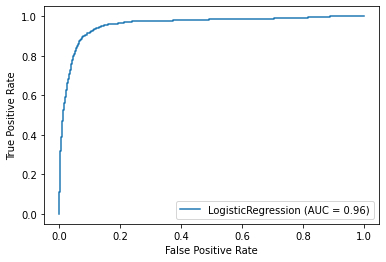

In [ ]:
#### Plotting the roc curve for the model fit ####

plot_roc_curve(LR_model,X =features_train, y= target_train)

In [ ]:
### Getting confusion matrix, F-score on the train data #####

print(confusion_matrix(y_true = target_train, y_pred = LR_model.predict(features_train))) ### confusion matrix for pred on train set

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=target_train,y_pred = LR_model.predict(features_train),sample_weight = target_train))

[[6620  634]
 [  82  787]]
The F1-SCORE on the train set prediction  0.9504830917874396


In [ ]:
##### Lets evaluate the performace on the test set #####
#print(Y_val.value_counts())

#plot_roc_curve(LR_model,X =features_val, y= target_val)

predicted_val = LR_model.predict(features_val)

print (confusion_matrix(y_true = target_val, y_pred = predicted_val))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=target_val,y_pred = predicted_val,sample_weight =target_val))

[[1654  160]
 [  22  195]]
The F1-SCORE on the test set prediction  0.9466019417475728


In [ ]:
with open('logistic_model.pickle','wb') as f:
    pickle.dump(LR_model,f)

In [ ]:
with open('logistic_model.pickle','rb') as f:
    model = pickle.load(f)

In [ ]:
##### fitting a decision tree #####

##### We experiment ###
#### max_depth = 5, max_features = 8,   min_samples_split = 10 --> Training f1 score, val f1 score
#### max_depth = 7, max_features = 10,  min_samples_split = 8 --> Trining f1 score, val f1 score
#### max_depth = 9, max_features = 12,  min_samples_split = 6 --> Trining f1 score, val f1 score
#### max_depth = 20, max_features = 69, min_sample_split = 2 --> Training F1 score, val f1 score
#### max_depth = 15, max_features = 50, min_sample_split = 5 --> Training F1 score, val f1 score

clf = DecisionTreeClassifier(class_weight ='balanced',
                             max_depth = 5, 
                             criterion = 'entropy',
                             max_features=8,
                             min_samples_split=10)

clf.fit(features_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
##### Creating a decision tree classifier ####

clf=DecisionTreeClassifier()
#clf = LogisticRegression()  
#clf = SVC()

params={'class_weight':['balanced'],      
        'max_features' : [1,5,6,8,10,12],
        'max_depth' : [6,7,8,9,10],
        'criterion' :['gini','entropy'],
        'min_samples_split' : [2,5,10,20]}           ### parameter distribution 


In [ ]:
1*6*5*2*4

240

In [ ]:
#### clas - balanced, max_features - 1, max_depth - 6, criterion - 'gini', min_sample_split- 2
#### class - balanced, max_features - 1, max_depth - 6, criterion - 'gini', min_sample_split - 5
#### class - balanced, max_features - 1, max_depth - 6, criterion - 'gini', min_sample_split -10

### class - balanced, max_features - 5, max_depth - 10, criterion - 'gini', min_sample_split -  10

In [ ]:
##### Fitting grid search cv to find the best combination of hyper parameters ####

grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1', return_train_score=True)

grid_search.fit(features_train,target_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                       

In [ ]:
type(grid_search.cv_results_)

dict

In [ ]:
a = grid_search.cv_results_
list(a.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_class_weight',
 'param_criterion',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_split',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [ ]:
a['params'][100], a['mean_train_score'][100], a['mean_test_score'][100]

({'class_weight': 'balanced',
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': 5,
  'min_samples_split': 2},
 0.5932373311036349,
 0.4597385523760945)

In [ ]:
a['']

In [ ]:
a['mean_train_score']

array([0.2968382 , 0.29184474, 0.27797864, 0.32756359, 0.41899166,
       0.46324107, 0.48822953, 0.4030953 , 0.46145331, 0.45566297,
       0.38066896, 0.49699888, 0.5423129 , 0.56723575, 0.54958158,
       0.51606397, 0.56455523, 0.53220727, 0.58261648, 0.5643954 ,
       0.61404185, 0.52744361, 0.56607619, 0.5935049 , 0.26792606,
       0.31607331, 0.33100131, 0.27995924, 0.44723708, 0.47506993,
       0.4930911 , 0.48057913, 0.50207416, 0.49426352, 0.46352629,
       0.49508236, 0.58737495, 0.5041134 , 0.48148639, 0.57703257,
       0.61688818, 0.55746613, 0.60531673, 0.59219414, 0.60359672,
       0.59911083, 0.56191338, 0.56045743, 0.29845278, 0.33356722,
       0.28691991, 0.40816055, 0.46380484, 0.47701168, 0.54091219,
       0.4755862 , 0.5399905 , 0.51788781, 0.53326275, 0.51133581,
       0.58223423, 0.61328643, 0.58167314, 0.54586144, 0.60449399,
       0.55968797, 0.65071332, 0.61885717, 0.6925114 , 0.60566281,
       0.66552423, 0.70281903, 0.35497843, 0.35348022, 0.33600

In [ ]:
grid_search.cv_results_['params']
print(grid_search.cv_results_['mean_test_score'])
print(grid_search.cv_results_['mean_train_score'])

print(grid_search.cv_results_['params'][10])

[0.19475487 0.24473023 0.21190956 0.1669288  0.31305309 0.21962542
 0.36898273 0.29012254 0.25617661 0.23110192 0.42205414 0.33229939
 0.11934149 0.16031815 0.25534131 0.2787693  0.24130251 0.23456838
 0.33192438 0.34904643 0.23958848 0.25856985 0.35287184 0.36492149]
[0.2103397  0.24606002 0.21136605 0.17383824 0.32521225 0.23882485
 0.38092303 0.30969262 0.27231912 0.2491024  0.44897143 0.34096592
 0.13142434 0.16501146 0.25044151 0.28194486 0.25486461 0.25380261
 0.33368178 0.36634283 0.25317389 0.28797781 0.37558985 0.38525349]
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 2}


In [ ]:
print(grid_search.best_estimator_) #### Automatically give you the best parameter combination

#print(grid_search.best_score_) #### best score

#print(grid_search.cv_results_) ### dictionary ('What are the parameter combinations', avg_train_f1_score, avg_val_f1_score)

#best_params = grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
### Manually split the data into 1 fold 80% 20%
### create a decision tree model with the best combination that was identified
### Predict on the train set using the built model.
### AUC,confusion matrix, f1score on the trainpredictions
### prediction on the validation set
### AUC, Confusion matrix,f1 score

In [ ]:
#### Fitting on the entire dataset ####

#clf = DecisionTreeClassifier(max_depth =5, max_features =5, criterion = 'gini')

clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=50, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=50, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[[6812  442]
 [  68  801]]
The F1-SCORE on the train set prediction  0.9592814371257484


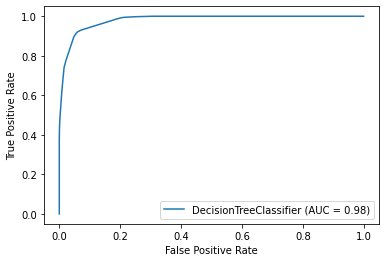

In [ ]:
### Evaluating on the train and the test set ####

predicted_train = clf.predict(X_train)

plot_roc_curve(clf,X =X_train, y= Y_train)

#print ('The score for the DT model ', roc_auc_score(Y_train,predicted_train))

print(confusion_matrix(y_true = Y_train, y_pred = predicted_train))

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=Y_train,y_pred = predicted_train,sample_weight = Y_train))

[[1682  132]
 [  32  185]]
The F1-SCORE on the test set prediction  0.9203980099502488


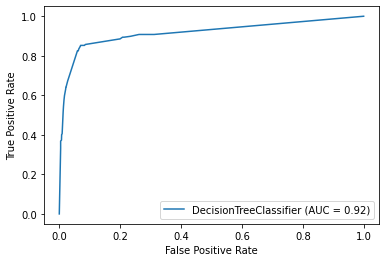

In [ ]:
plot_roc_curve(clf,X =X_val, y= Y_val)

predicted_test = clf.predict(X_val)

print (confusion_matrix(y_true = Y_val, y_pred = predicted_test))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=Y_val,y_pred = predicted_test,sample_weight = Y_val))

In [ ]:
### Calculating the feature importances ####

importances = clf.feature_importances_

columns = list(X_train.columns)

importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

importances_dict = dict(sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True))

In [ ]:
data['age_band'].value_counts()

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [ ]:
importances_dict

{'Average A/C Balance': 0.009589225329617231,
 'Average Credit Card Transaction': 0.07287466065747035,
 'Balance Transfer': 0.0,
 'Home Loan': 0.005919866357424682,
 'Investment Tax Saving Bond': 0.15863513226147152,
 'Investment in Commudity': 0.20133786154180974,
 'Investment in Derivative': 0.031203133015147134,
 'Investment in Equity': 0.003064345329717135,
 'Investment in Mutual Fund': 0.0,
 'Life Insurance': 0.05939864315157473,
 'Medical Insurance': 0.006762384080429247,
 'Online Purchase Amount': 0.41621269868212873,
 'Personal Loan': 0.012690852754192905,
 'Portfolio Balance': 0.0,
 'Term Deposit': 0.0223111968390167,
 'age_band_18-21': 0.0,
 'age_band_22-25': 0.0,
 'age_band_26-30': 0.0,
 'age_band_31-35': 0.0,
 'age_band_36-40': 0.0,
 'age_band_41-45': 0.0,
 'age_band_45-50': 0.0,
 'age_band_51-55': 0.0,
 'age_band_55-60': 0.0,
 'age_band_61-65': 0.0,
 'age_band_65-70': 0.0,
 'age_band_71+': 0.0,
 'chidren_1': 0.0,
 'chidren_2': 0.0,
 'chidren_3': 0.0,
 'chidren_Zero': 0.0,


In [ ]:
X_train.columns

Index(['Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance', 'chidren_1',
       'chidren_2', 'chidren_3', 'chidren_Zero', 'age_band_18-21',
       'age_band_22-25', 'age_band_26-30', 'age_band_31-35', 'age_band_36-40',
       'age_band_41-45', 'age_band_45-50', 'age_band_51-55', 'age_band_55-60',
       'age_band_61-65', 'age_band_65-70', 'age_band_71+', 'status_Partner',
       'status_Single/Never Married', 'status_Widowed', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'occupation_Unknown', 'occupation_pa

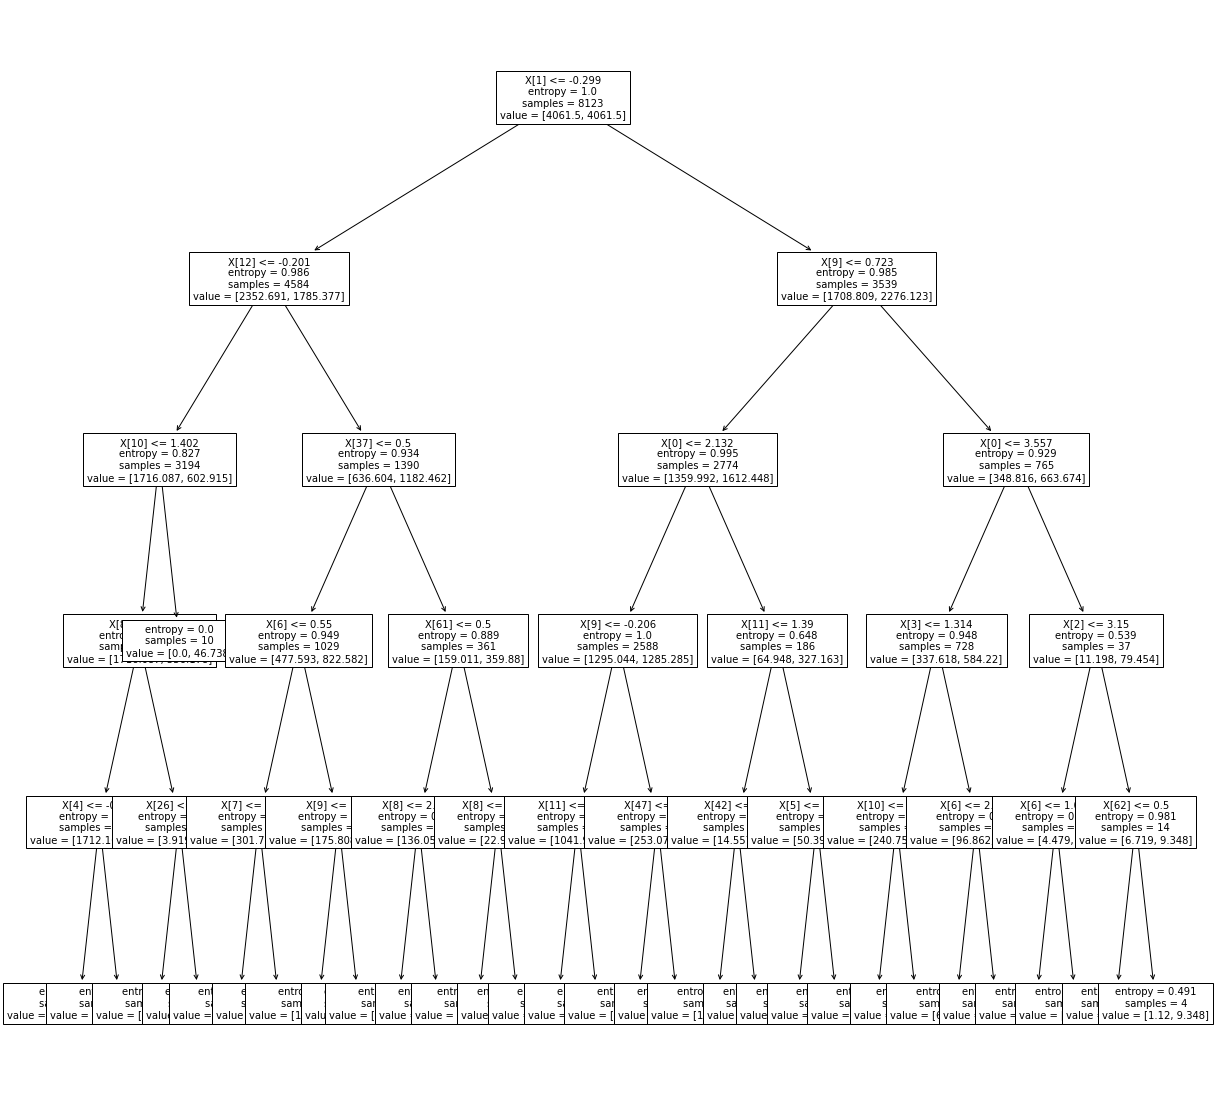

In [ ]:
from sklearn.tree import plot_tree
plot_rows =1
plot_cols = 1

fig, ax1 = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

plot_tree(clf,ax=ax1,fontsize=10)
plt.show()

In [ ]:
#### Saving the model ###

with open('decision_tree_model.pickle','wb') as f:
    pickle.dump(clf,f)


In [ ]:
#### Fitting a decision tree classifier ######

clf = RandomForestClassifier() ### random forest function from  sklearn

params={'n_estimators':[50,70],
        'class_weight':['balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[8,9],
        'min_samples_split':[5,10,12],
        'max_samples':[0.7,0.8]}        #### parameter combinations

In [ ]:
#combinations - 3*1*2*3*5*3 - 270

### RF models - 270*5

### Decision Trees - 50*90*5 + 70*90*5 +100*90*5 =  22500 + 31500 + 45000 = 99000 

##combination-1 : n_estimators = 50 class_weight = balanced, criterion ='entropy', max_depth = 8, min_samples_spli=5,max_samples = 0.7

In [ ]:
##### Fitting grid search cv to find the best combination of hyper parameters ####

grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'roc_auc',return_train_score=True)

grid_search.fit(features_df,target_df)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
a = grid_search.cv_results_ ### parameter comb,train_score, val_score

print(a['params'][1])

print(a['mean_train_score'][1])

print(a['mean_test_score'][1])

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_samples': 0.7, 'min_samples_split': 5, 'n_estimators': 70}
0.9946593236348207
0.9773707338673534


In [ ]:
combinations = grid_search.cv_results_['params']
len(combinations)

288

In [ ]:
best_estimator = grid_search.best_estimator_

In [ ]:
best_estimator

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(best_estimator) #### best combination

print(grid_search.best_score_) #### best score

best_params = grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9812045892654725


In [ ]:
clf = best_estimator

clf.fit(features_train,target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The score for the DT model  0.961203580231755
[[7000  254]
 [  37  832]]
The F1-SCORE on the train set prediction  0.9782480893592005


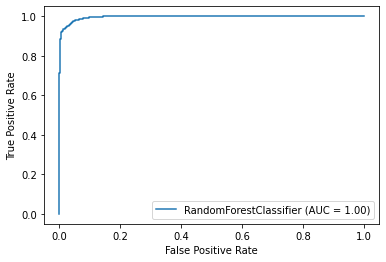

In [ ]:
### Evaluating on the train and the test set ####

predicted_train = clf.predict(features_train)

plot_roc_curve(clf,X =features_train, y= target_train)

print ('The score for the DT model ', roc_auc_score(target_train,predicted_train))

print(confusion_matrix(y_true = target_train, y_pred = predicted_train))

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=target_train,y_pred = predicted_train,sample_weight = target_train))

[[1717   97]
 [  31  186]]
The F1-SCORE on the test set prediction  0.923076923076923


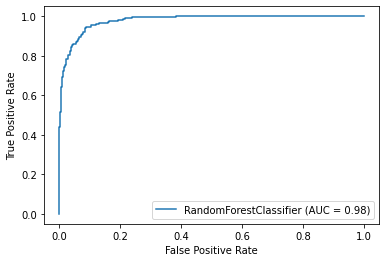

In [ ]:
plot_roc_curve(clf,X =features_val, y= target_val)

predicted_test = clf.predict(features_val)

print (confusion_matrix(y_true = target_val, y_pred = predicted_test))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=target_val,y_pred = predicted_test,sample_weight = target_val))

In [ ]:
### Calculating the feature importances ####

importances = clf.feature_importances_

columns = list(features_train.columns)

importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

importances_dict = dict(sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True))

In [ ]:
importances_dict

{'Average A/C Balance': 0.024392911243365206,
 'Average Credit Card Transaction': 0.08357994198862981,
 'Balance Transfer': 0.019609118579775965,
 'Home Loan': 0.014962181563734902,
 'Investment Tax Saving Bond': 0.10087547287717358,
 'Investment in Commudity': 0.07058994883208017,
 'Investment in Derivative': 0.04936406559791021,
 'Investment in Equity': 0.0979241760179422,
 'Investment in Mutual Fund': 0.023918134119869372,
 'Life Insurance': 0.05867529570690675,
 'Medical Insurance': 0.01900296926976342,
 'Online Purchase Amount': 0.23553856903589343,
 'Personal Loan': 0.03414194287565974,
 'Portfolio Balance': 0.07817039627869798,
 'Term Deposit': 0.027735611265618878,
 'age_band_18-21': 0.00016340321027871502,
 'age_band_22-25': 0.0005812314486469592,
 'age_band_26-30': 0.001223462173034679,
 'age_band_31-35': 0.0013976199655973969,
 'age_band_36-40': 0.0014602575894732174,
 'age_band_41-45': 0.0010646582578126636,
 'age_band_45-50': 0.0013165616506057756,
 'age_band_51-55': 0.001

In [ ]:
##### Saving the model into a pickle file #####
import pickle

with open('/Users/anil.goyal/Documents/random_forest_model_1.pickle','wb') as f:
    pickle.dump(clf,f)

In [ ]:
##### Loading the model from a pickle file #####

import pickle

with open('/Users/anil.goyal/Documents/random_forest_model_1.pickle','rb') as f:
    model = pickle.load(f)

FileNotFoundError: ignored